# Bootstrapping
You conducted an experiment and got values. But is that the true value? You cannot confidently say it. You would want to conduct the experiment multiple times, in different scenarios to go close to the true value. But [India's expenditure on RnD is among the lowest in the world.](https://economictimes.indiatimes.com/news/india/indias-rd-spends-amongst-the-lowest-in-the-world-niti-aayog-study/articleshow/93024586.cms?from=mdr). You don't have enough money to conduct many experiments. And hence, you take help of Statisitics. Because, [Indians are good at math](https://www.hindustantimes.com/india-news/indians-are-so-good-at-mathematics-and-physics-when-stephen-hawking-came-to-india/story-qeRRbpPJK15LCHsNEKWiLK.html).

`Bootstrapping is a statistical method in which we resample the original sample to calculate any stat with more confidence.`

## Steps of bootstrapping
1. Make a `bookstrapped dataset` from the original dataset.
2. Calculate something with the bootsrapped dataset (mean, median, SD)
3. Keep track of the calculation. (histogram)
4. Repeat 1,2,3

## Bootstrapped dataset:
Perform `Sampling with replacement` on the original dataset. The size of the bootsrapped dataset will be the same as the original dataset.

Use the histogram to calculate the SE and CI of the required statistic (mean, median .. )

## Use-cases:
1. `Hypothesis testing`
2. `It helps in estimating the underlying distribution.` (look at the histogram)

In [1]:
data = [2,4,9,12]

In [2]:
from scipy.stats import bootstrap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#convert array to sequence
data = (data,)

#calculate 95% bootstrap for mean
bootstraped = bootstrap(data, np.mean, confidence_level=0.95,
                         random_state=111, method='percentile')

In [3]:
print(bootstraped.confidence_interval)

ConfidenceInterval(low=3.0, high=10.5)


In [5]:
distribution = bootstraped.bootstrap_distribution
distribution

array([2.  , 8.5 , 8.  , ..., 8.  , 7.25, 8.75])

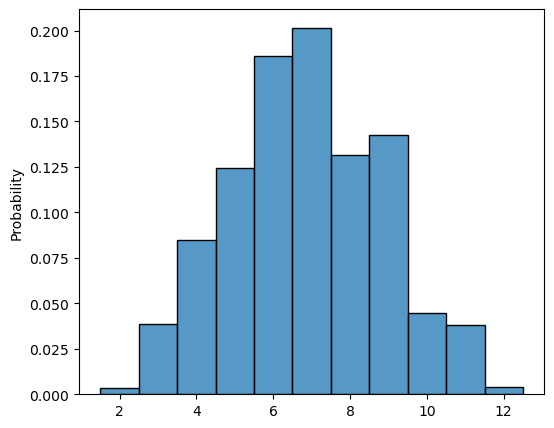

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))
p = sns.histplot(data=distribution, stat='probability', discrete=True, ax=ax)
plt.show()

# Bootstrapping using 'chance' probability

In the above section, we caclulated probability of each average using frequency method. We basically took samples 9999 times and then plotted the frequency of each average obtained.

We can also obtain these probabilities using counting methods.

In [7]:
# Boot strapping through probabilities
from math import comb, factorial
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement

In [8]:
data = [2, 4, 9, 12]
unordered_samplesspace = list(combinations_with_replacement(data, len(data)))
unordered_samplesspace

[(2, 2, 2, 2),
 (2, 2, 2, 4),
 (2, 2, 2, 9),
 (2, 2, 2, 12),
 (2, 2, 4, 4),
 (2, 2, 4, 9),
 (2, 2, 4, 12),
 (2, 2, 9, 9),
 (2, 2, 9, 12),
 (2, 2, 12, 12),
 (2, 4, 4, 4),
 (2, 4, 4, 9),
 (2, 4, 4, 12),
 (2, 4, 9, 9),
 (2, 4, 9, 12),
 (2, 4, 12, 12),
 (2, 9, 9, 9),
 (2, 9, 9, 12),
 (2, 9, 12, 12),
 (2, 12, 12, 12),
 (4, 4, 4, 4),
 (4, 4, 4, 9),
 (4, 4, 4, 12),
 (4, 4, 9, 9),
 (4, 4, 9, 12),
 (4, 4, 12, 12),
 (4, 9, 9, 9),
 (4, 9, 9, 12),
 (4, 9, 12, 12),
 (4, 12, 12, 12),
 (9, 9, 9, 9),
 (9, 9, 9, 12),
 (9, 9, 12, 12),
 (9, 12, 12, 12),
 (12, 12, 12, 12)]

Each unordered sample of the above 35 samples `(n+m-1 C n)` has an average. Sometimes the two different samples can have the same average. For instance `(4, 4, 12, 12)` and `(2, 9, 9, 12)` have the same average of `8`. Hence the probability of getting average `8` is the sum of probabilities of finding both these samples.

**Now how to calculate the probability of picking one of these samples?** *Is it not 1/35?* Obviously, NO!

When you pick four numbers from `(2,4,9,12)` with replacement - there are actually 4^4 (256) ways of doing it. These 256 are ordered samples. And each of these 256 have equal probability.

Each sample from the `unordered sample space` has multiple samples associated in the `ordered sample space`. For instance:
1. `{2,2,2,2}` is only associated  `(2,2,2,2)`
2. `{2,2,2,4}` is associated with `(2,2,2,4); (2,2,4,2); (2,4,2,2); (4,2,2,2)`

etc

Hence, each unordered sample has `n!/(k1!*k2!...)`; where
1. `n - size of unordered sample`
2. `k1, k2....` are reptitions of any number.

In [9]:
means = []
probs = []
for unordered_sample in unordered_samplesspace:
    means.append(np.mean(unordered_sample))
    repetitions = [[x,unordered_sample.count(x)] for x in set(unordered_sample)]
    reptitions_factorials = np.prod([factorial(repetition[1]) for repetition in repetitions])

    num_associated_ordered_samples = factorial(len(unordered_sample))/(reptitions_factorials)
    prob_unordered_sample = (num_associated_ordered_samples)/256
    probs.append(prob_unordered_sample)

In [10]:
df = pd.DataFrame([means, probs]).T
df.columns = ['avg', 'prob']

In [11]:
df = df.groupby('avg')[['prob']].sum().reset_index()
df

,avg,prob
0,2.00,0.003906
1,2.50,0.015625
2,3.00,0.023438
3,3.50,0.015625
4,3.75,0.015625
5,4.00,0.003906
6,4.25,0.046875
7,4.50,0.015625
8,4.75,0.046875
9,5.00,0.046875


In [12]:
df.prob.sum()

1.0

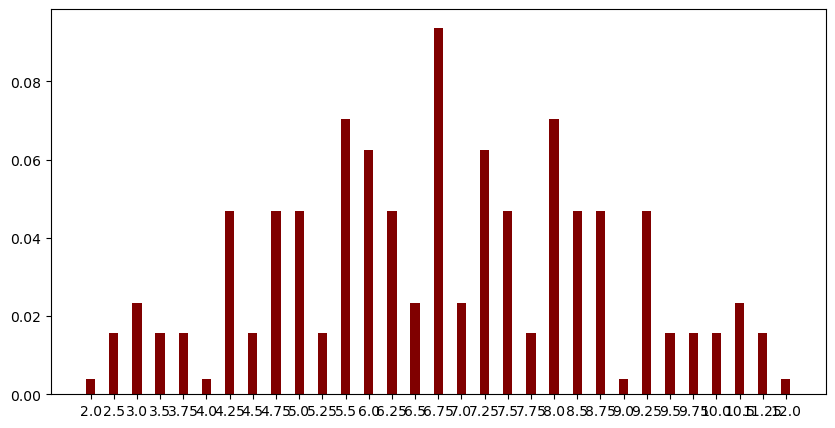

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(df.avg.astype(str), df.prob, color ='maroon',width = 0.4)
plt.show()

References:
1. [StatQuest - Part1](https://www.youtube.com/watch?v=Xz0x-8-cgaQ)
2. [StatQuest - Part2](https://www.youtube.com/watch?v=N4ZQQqyIf6k)
3. [SciPy - Bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)
4. `Examples 1.2.20 and A.0.1; Statistical Inference by George Casella and Roger L.Berger.`